## ```Imports```
---

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import pickle

In [17]:
fraud = pd.read_csv('/Users/crivera/Desktop/capstone-dsir82/capstone_data/final_model.csv')

In [18]:
fraud.shape

(361064, 18)

In [19]:
fraud['is_fraud'].value_counts(normalize=True)

0    0.994076
1    0.005924
Name: is_fraud, dtype: float64

In [20]:
fraud.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour
0,2019-01-01 00:26:22,3598215285024754,fraud_Heidenreich PLC,grocery_pos,207.36,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21 00:00:00,40.202538,-73.859212,0,0
1,2019-01-01 00:29:11,4789911625179723,"fraud_Mosciski, Gislason and Mertz",grocery_pos,221.81,F,Moriches,NY,11955,40.8095,-72.8229,3285,"Research officer, trade union",1988-04-27 00:00:00,40.011959,-72.594808,0,0
2,2019-01-01 00:31:01,30011465039817,fraud_Howe Ltd,misc_pos,54.02,F,Chatham,NY,12037,42.3496,-73.5873,4015,Human resources officer,1971-10-14 00:00:00,42.041783,-73.076424,0,0


## ```Creating Smote Balanced Classes Data Set for final Modeling```
---

In [21]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361064 entries, 0 to 361063
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  361064 non-null  object 
 1   cc_num                 361064 non-null  int64  
 2   merchant               361064 non-null  object 
 3   category               361064 non-null  object 
 4   amt                    361064 non-null  float64
 5   gender                 361064 non-null  object 
 6   city                   361064 non-null  object 
 7   state                  361064 non-null  object 
 8   zip                    361064 non-null  int64  
 9   lat                    361064 non-null  float64
 10  long                   361064 non-null  float64
 11  city_pop               361064 non-null  int64  
 12  job                    361064 non-null  object 
 13  dob                    361064 non-null  object 
 14  merch_lat              361064 non-nu

In [22]:
# dummy for object variables
df_fraud = fraud.copy()
df_fraud = pd.get_dummies(fraud, columns=['gender','city','state','category','merchant'])
df_fraud.shape

(361064, 980)

In [23]:
df_fraud.head(2)

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,job,dob,merch_lat,...,"merchant_fraud_Yost, Schamberger and Windler",merchant_fraud_Yost-Rogahn,merchant_fraud_Zboncak LLC,merchant_fraud_Zboncak Ltd,"merchant_fraud_Zboncak, Rowe and Murazik",merchant_fraud_Zemlak Group,"merchant_fraud_Zemlak, Tillman and Cremin",merchant_fraud_Ziemann-Waters,"merchant_fraud_Zieme, Bode and Dooley",merchant_fraud_Zulauf LLC
0,2019-01-01 00:26:22,3598215285024754,207.36,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21 00:00:00,40.202538,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-01 00:29:11,4789911625179723,221.81,11955,40.8095,-72.8229,3285,"Research officer, trade union",1988-04-27 00:00:00,40.011959,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#set up X/y
X = df_fraud.drop(columns=['trans_date_trans_time','lat','long','job','merch_lat','merch_long','dob','is_fraud'])
y = df_fraud['is_fraud']
print(f"Target is_fraud value_counts: {y.value_counts()}")

# Instantiate Smote Class
smo = SMOTE(random_state=42)

print('====')
# Synthetically enhance minority class
X_smo, y_smo = smo.fit_resample(X,y)
print(f"Smote Target value_counts: {y_smo.value_counts()}")

Target is_fraud value_counts: 0    358925
1      2139
Name: is_fraud, dtype: int64
====
Smote Target value_counts: 0    358925
1    358925
Name: is_fraud, dtype: int64


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_smo,y_smo,stratify=y_smo,train_size=0.7)

ERROR! Session/line number was not unique in database. History logging moved to new session 2045


In [29]:
# instantiate class object
ss = StandardScaler()

# Scale Data 
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

train Acc: 1.0
test Acc: 0.9976411151767306


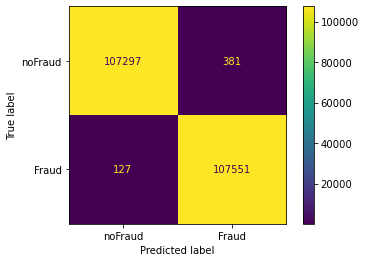

In [32]:
# train model
dt = DecisionTreeClassifier()
dt.fit(X_train_ss,y_train)

# score model
print(f"train Acc: {dt.score(X_train_ss,y_train)}")
print(f"test Acc: {dt.score(X_test_ss,y_test)}")

# Confusion Matrix
plot_confusion_matrix(dt, X_test_ss, y_test, display_labels=['noFraud','Fraud'])
plt.show()

In [35]:
with open('../app_model/dt.pkl', mode = 'wb') as pickle_out:
    pickle_out = pickle.dump(dt, pickle_out)

In [74]:
with open('../app_model/dt.pkl', 'rb') as pickle_in:
    dt = pickle.load(pickle_in)

In [75]:
dt.predict(X_test_ss)

array([1, 1, 0, ..., 0, 1, 0])

In [39]:
fraud.groupby('state')['is_fraud'].sum()

state
CA    326
NY    555
OH    321
PA    458
TX    479
Name: is_fraud, dtype: int64

In [40]:
fraud['cc_num'].nunique()

279

In [48]:
len(str(fraud['cc_num'][0]))

16

In [49]:
import numpy as np

In [61]:
np.random.randint(1,10,size=10)

array([3, 4, 6, 3, 6, 9, 2, 5, 5, 9])

In [62]:
X_train

Index(['cc_num', 'amt', 'zip', 'city_pop', 'hour', 'gender_F', 'gender_M',
       'city_Akron', 'city_Albany', 'city_Aledo',
       ...
       'merchant_fraud_Yost, Schamberger and Windler',
       'merchant_fraud_Yost-Rogahn', 'merchant_fraud_Zboncak LLC',
       'merchant_fraud_Zboncak Ltd',
       'merchant_fraud_Zboncak, Rowe and Murazik',
       'merchant_fraud_Zemlak Group',
       'merchant_fraud_Zemlak, Tillman and Cremin',
       'merchant_fraud_Ziemann-Waters',
       'merchant_fraud_Zieme, Bode and Dooley', 'merchant_fraud_Zulauf LLC'],
      dtype='object', length=972)

In [67]:
fraud['city_pop'].mean()

164484.14546451598

In [68]:
fraud['city_pop'].median()

2526.0

In [71]:
np.random.choice(['gender_F','gender_M'])

'gender_F'

In [83]:
city = 'Lawrence'
cities = ['Boston','Methuen','Lawrence']
X = {}
for c in cities:
    if c!=city:
        X[c]=0
    else:
        X[c]=1


{'Boston': 0, 'Methuen': 0, 'Lawrence': 1}